<a href="https://colab.research.google.com/github/victormuuo/Data-Analysis---PYTHON/blob/main/Decidion_Tree_Iris_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree


In [ ]:
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
data=pd.DataFrame(iris.data,columns=iris.feature_names)
data['Species']=iris.target


In [ ]:
target=np.unique(iris.target)
target_n=np.unique(iris.target_names)
target_dict=dict(zip(target,target_n))
data['Species']=data['Species'].map(target_dict)

In [ ]:
x=data.drop(columns='Species')
y=data['Species']
names_features=x.columns
target_labels=y.unique

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=93)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DTC=DecisionTreeClassifier(max_depth=3,random_state=93)
DTC.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=93)

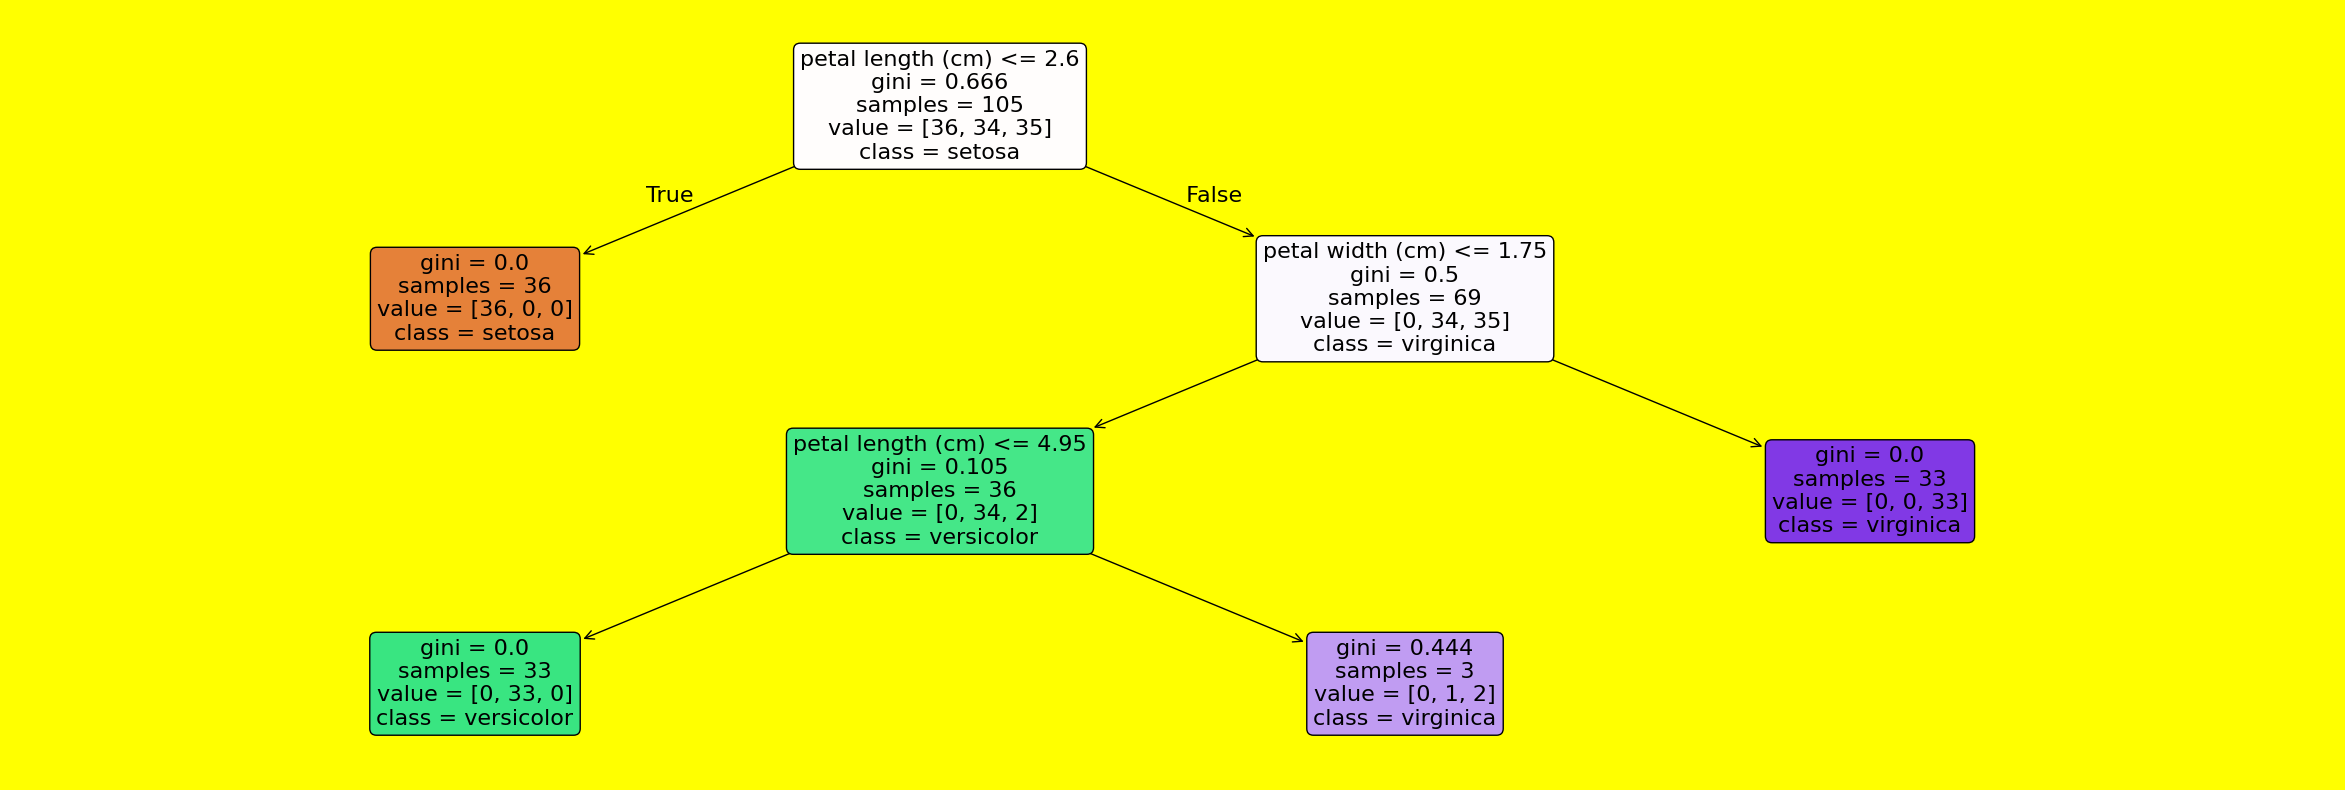

In [ ]:
plt.figure(figsize=(30,10), facecolor='yellow')
Tree=tree.plot_tree(DTC,filled=True,feature_names=names_features,class_names=target_labels(),rounded=True, fontsize=16)
plt.show()
y_pred=DTC.predict(X_test)

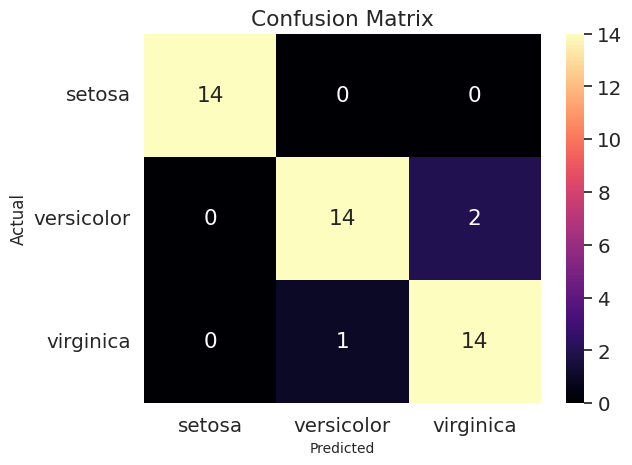

<Figure size 1000x700 with 0 Axes>

In [ ]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
matrix=pd.DataFrame(confusion_matrix)
axis=plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix,annot=True,fmt='g',ax=axis,cmap='magma')
axis.set_title('Confusion Matrix')
axis.set_xlabel('Predicted',fontsize=10)
axis.set_xticklabels(['']+target_labels())
axis.set_ylabel('Actual', fontsize=12)
axis.set_yticklabels(list(target_labels()), rotation=0)
plt.show()